# Using the relation between the accreted mass and period of equilibrium state for H (Li21) and L (Tauris12) model to calculate the accreted mass.

In [1]:
import numpy as np

def tauris_acc_m(p_birth):
    """
    see https://arxiv.org/abs/1206.1862 (Tauris12)  Eq.14
    paramaters：
    p_birth：the period of equilibrium state,unit: s
    return:
    The accreted mass given a period
    """
    return 0.22*(1.4**(1/3))/(p_birth*1000)**(4/3)

def li_acc_m(p_birth):
    """
    we fit the open circle in Figure 4. in arXiv:2108.02554v1 (Li21), and obtain parameters: a = 0.28, b=-0.5.
    paramaters：
    p_birth：the period of equilibrium state,unit: s
    return:
    The accreted mass given a period
    """
    a=0.28
    b=-0.5
    return a*(p_birth*1000)**b

def errf(p_birth):
    """
    the 1-sigma error is one-third of the difference between Tauris12  and the best fitted value for Li, ZW, et.al.(2021)
    paramaters：
    p_birth：the period of equilibrium state,unit: s
    return:
    The 1-sigma error bar for the accreted mass 
    """
    return (li_acc_m(p_birth)-tauris_acc_m(p_birth))*0.3


# Loading data

In [2]:
pran = np.loadtxt('plot_pran.txt')
delta_m_birth_ran = np.loadtxt('plot_delta_m_birth_ran.txt')
s_deltam_all = np.loadtxt('scatter_deltam_all.txt')

# plotting the figure $\Delta m$ $-$ $P_{eq}$

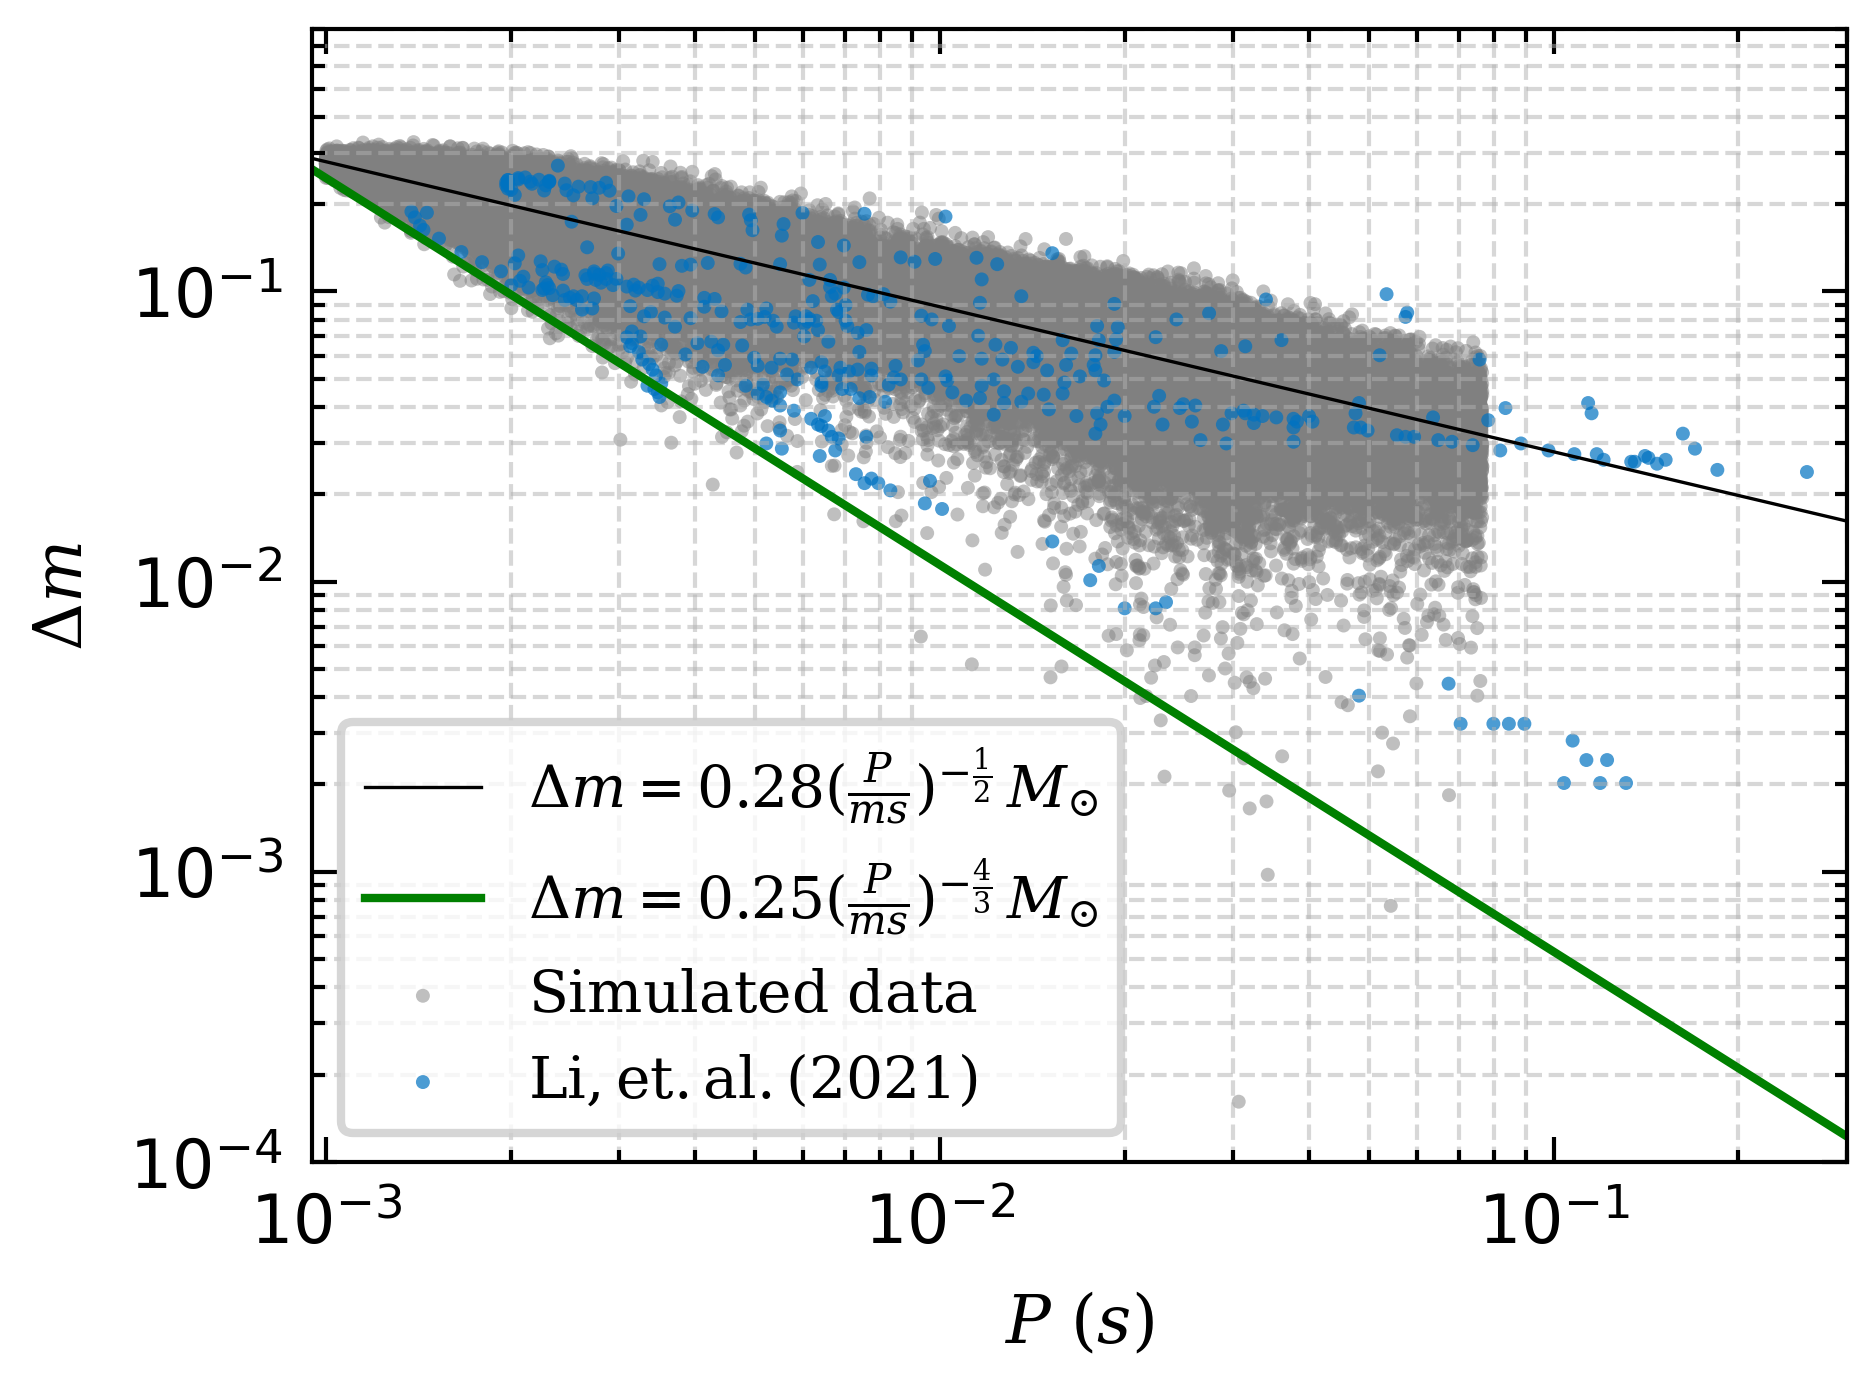

In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])

xx=np.linspace(0.00023,0.3,1000)
s_deltam_all=np.loadtxt('zhenwei2021.txt')

plt.figure()
plt.grid(b=True, which='minor',linestyle='--',alpha=0.5)
plt.plot(xx,li_acc_m(xx),c='k',ls='-',lw=0.4,label=r'${\Delta m=0.28(\frac{P}{ms})^{-\frac{1}{2}}\,M_{\odot}}$')

plt.scatter(pran,delta_m_birth_ran,s=2.8,lw=0.4,facecolor='grey',edgecolors='none',alpha=0.5,label=r'$\rm{Simulated\,\, data}$')
plt.scatter(s_deltam_all[:,0],s_deltam_all[:,1],s=2.8,lw=0.1,facecolor='#0072c1',edgecolors='none',alpha=0.7,label=r'$\rm{Li, et. al. (2021)}$')
plt.plot(xx,tauris_acc_m(xx),c='green',label=r'${\Delta m=0.25(\frac{P}{ms})^{-\frac{4}{3}}\,M_{\odot}}$')

plt.yscale('log')#calculate the equilibrium state: p0
plt.xlim(0.00095,0.3)
plt.ylim(10**(-4),0.8)
plt.xlabel(r'$P\,\,(s)$')
plt.ylabel(r'$\Delta m$')
plt.legend(frameon=True,fontsize=7)
plt.xscale('log')
plt.savefig('simulated_p_dm.jpg')
plt.show()